# Machine Learning Engineer Nanodegree Capstone Project
***

## Retention and Graduation Rate in U.S. Postsecondary Education

Kai-Sheng Wang
<br/>
April 23, 2020

## Analysis
***

### Data Exploration and Exploratory Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv('scorecard_data.csv')
data.sample(5)

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,INSTURL,NPCURL,HCM2,PREDDEG,HIGHDEG,CONTROL,LOCALE,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,SATVR25,SATVR75,SATMT25,SATMT75,SATWR25,SATWR75,SATVRMID,SATMTMID,SATWRMID,ACTCM25,ACTCM75,ACTEN25,ACTEN75,ACTMT25,ACTMT75,ACTWR25,ACTWR75,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,NPT4_PUB,NPT4_PRIV,NPT41_PUB,NPT42_PUB,NPT43_PUB,NPT44_PUB,NPT45_PUB,NPT41_PRIV,NPT42_PRIV,NPT43_PRIV,NPT44_PRIV,NPT45_PRIV,PCTPELL,RET_FT4_POOLED_SUPP,RET_FTL4_POOLED_SUPP,RET_PT4_POOLED_SUPP,RET_PTL4_POOLED_SUPP,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C200_L4_POOLED_SUPP,C200_4_POOLED_SUPP,OMAWDP8_FTFT_POOLED_SUPP,OMENRYP8_FTFT_POOLED_SUPP,OMENRAP8_FTFT_POOLED_SUPP,OMENRUP8_FTFT_POOLED_SUPP,OMAWDP8_PTFT_POOLED_SUPP,OMENRYP8_PTFT_POOLED_SUPP,OMENRAP8_PTFT_POOLED_SUPP,OMENRUP8_PTFT_POOLED_SUPP,OMAWDP8_FTNFT_POOLED_SUPP,OMENRYP8_FTNFT_POOLED_SUPP,OMENRAP8_FTNFT_POOLED_SUPP,OMENRUP8_FTNFT_POOLED_SUPP,OMAWDP8_PTNFT_POOLED_SUPP,OMENRYP8_PTNFT_POOLED_SUPP,OMENRAP8_PTNFT_POOLED_SUPP,OMENRUP8_PTNFT_POOLED_SUPP,OPEFLAG,PRGMOFR,CIPCODE1,CIPCODE2,CIPCODE3,CIPCODE4,CIPCODE5,CIPCODE6,CIPTITLE1,CIPTITLE2,CIPTITLE3,CIPTITLE4,CIPTITLE5,CIPTITLE6,CIPTFBS1,CIPTFBS2,CIPTFBS3,CIPTFBS4,CIPTFBS5,CIPTFBS6,CIPTFBSANNUAL1,CIPTFBSANNUAL2,CIPTFBSANNUAL3,CIPTFBSANNUAL4,CIPTFBSANNUAL5,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,OMENRYP_ALL_POOLED_SUPP,OMENRAP_ALL_POOLED_SUPP,OMAWDP8_ALL_POOLED_SUPP,OMENRUP_ALL_POOLED_SUPP,OMENRYP_FIRSTTIME_POOLED_SUPP,OMENRAP_FIRSTTIME_POOLED_SUPP,OMAWDP8_FIRSTTIME_POOLED_SUPP,OMENRUP_FIRSTTIME_POOLED_SUPP,OMENRYP_NOTFIRSTTIME_POOLED_SUPP,OMENRAP_NOTFIRSTTIME_POOLED_SUPP,OMAWDP8_NOTFIRSTTIME_POOLED_SUPP,OMENRUP_NOTFIRSTTIME_POOLED_SUPP,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP
6401,13508104,2151906,21519,Keiser University-Lakeland,Lakeland,FL,www.keiseruniversity.edu,NaN,0,0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31100,25031,259.779434278489,0.3012249153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1608,170532,227500,2275,Kalamazoo College,Kalamazoo,MI,www.kzoo.edu,www.kzoo.edu/admission/index.php?p=npc,0,3,3,2,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0000,0.0,0.016,0.0000,0.0,0.0577,0.0000,0.0000,0.0000,0.0000,0.0224,0.0000,0.0,0.0801,0.0000,0.0,0.1763,0.0192,0.0,0.0064,0.0000,0.0513,0.0000,0.1122,0.0,0.0994,0.0000,0.0000,0.1346,0.0,0.000,0.0000,0.0,0.0641,0.0000,0.1346,0.0256,0.0,1446.0,0.5788,0.0761,0.1418,0.0705,0.0007,0.0000,0.0436,0.0588,0.0297,0.0062,1,NaN,23667.0,NaN,NaN,NaN,NaN,NaN,14564.0,20391.0,18975.0,25217.0,30603.0,0.2396,0.9055,NaN,NaN,NaN,0.5397,0.0007,48700,24500,254.268552587711,0.8250591017,NaN,0.8285,0.8274,0.001

In [3]:
data.shape

(6806, 190)

- The dataset has 6806 data points with 190 variables each

In [4]:
duplicated = data[data.duplicated(keep=False)]
duplicated

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,INSTURL,NPCURL,HCM2,PREDDEG,HIGHDEG,CONTROL,LOCALE,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,SATVR25,SATVR75,SATMT25,SATMT75,SATWR25,SATWR75,SATVRMID,SATMTMID,SATWRMID,ACTCM25,ACTCM75,ACTEN25,ACTEN75,ACTMT25,ACTMT75,ACTWR25,ACTWR75,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,NPT4_PUB,NPT4_PRIV,NPT41_PUB,NPT42_PUB,NPT43_PUB,NPT44_PUB,NPT45_PUB,NPT41_PRIV,NPT42_PRIV,NPT43_PRIV,NPT44_PRIV,NPT45_PRIV,PCTPELL,RET_FT4_POOLED_SUPP,RET_FTL4_POOLED_SUPP,RET_PT4_POOLED_SUPP,RET_PTL4_POOLED_SUPP,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C200_L4_POOLED_SUPP,C200_4_POOLED_SUPP,OMAWDP8_FTFT_POOLED_SUPP,OMENRYP8_FTFT_POOLED_SUPP,OMENRAP8_FTFT_POOLED_SUPP,OMENRUP8_FTFT_POOLED_SUPP,OMAWDP8_PTFT_POOLED_SUPP,OMENRYP8_PTFT_POOLED_SUPP,OMENRAP8_PTFT_POOLED_SUPP,OMENRUP8_PTFT_POOLED_SUPP,OMAWDP8_FTNFT_POOLED_SUPP,OMENRYP8_FTNFT_POOLED_SUPP,OMENRAP8_FTNFT_POOLED_SUPP,OMENRUP8_FTNFT_POOLED_SUPP,OMAWDP8_PTNFT_POOLED_SUPP,OMENRYP8_PTNFT_POOLED_SUPP,OMENRAP8_PTNFT_POOLED_SUPP,OMENRUP8_PTNFT_POOLED_SUPP,OPEFLAG,PRGMOFR,CIPCODE1,CIPCODE2,CIPCODE3,CIPCODE4,CIPCODE5,CIPCODE6,CIPTITLE1,CIPTITLE2,CIPTITLE3,CIPTITLE4,CIPTITLE5,CIPTITLE6,CIPTFBS1,CIPTFBS2,CIPTFBS3,CIPTFBS4,CIPTFBS5,CIPTFBS6,CIPTFBSANNUAL1,CIPTFBSANNUAL2,CIPTFBSANNUAL3,CIPTFBSANNUAL4,CIPTFBSANNUAL5,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,OMENRYP_ALL_POOLED_SUPP,OMENRAP_ALL_POOLED_SUPP,OMAWDP8_ALL_POOLED_SUPP,OMENRUP_ALL_POOLED_SUPP,OMENRYP_FIRSTTIME_POOLED_SUPP,OMENRAP_FIRSTTIME_POOLED_SUPP,OMAWDP8_FIRSTTIME_POOLED_SUPP,OMENRUP_FIRSTTIME_POOLED_SUPP,OMENRYP_NOTFIRSTTIME_POOLED_SUPP,OMENRAP_NOTFIRSTTIME_POOLED_SUPP,OMAWDP8_NOTFIRSTTIME_POOLED_SUPP,OMENRUP_NOTFIRSTTIME_POOLED_SUPP,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP


In [5]:
df = data.copy()

- No duplicated rows found
- A new dataframe "df" created for data cleaning and feature selection

In [6]:
for col in ['OPEID', 'OPEID6', 'UNITID']:
    print("Duplicates in {}: {}".format(col,df[col].duplicated().sum()))

Duplicates in OPEID: 30
Duplicates in OPEID6: 1460
Duplicates in UNITID: 0


In [7]:
drop_list = ['OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'INSTURL', 'NPCURL', 'HCM2', 'LOCALE', 'HBCU', 'PBI', 
             'ANNHI', 'TRIBAL', 'AANAPII', 'HSI', 'NANTI', 'RELAFFIL', 'CURROPER', 'OMAWDP8_FTFT_POOLED_SUPP', 
             'OMENRYP8_FTFT_POOLED_SUPP', 'OMENRAP8_FTFT_POOLED_SUPP', 'OMENRUP8_FTFT_POOLED_SUPP', 
             'OMAWDP8_PTFT_POOLED_SUPP', 'OMENRYP8_PTFT_POOLED_SUPP', 'OMENRAP8_PTFT_POOLED_SUPP',
             'OMENRUP8_PTFT_POOLED_SUPP', 'OMAWDP8_FTNFT_POOLED_SUPP', 'OMENRYP8_FTNFT_POOLED_SUPP',
             'OMENRAP8_FTNFT_POOLED_SUPP', 'OMENRUP8_FTNFT_POOLED_SUPP', 'OMAWDP8_PTNFT_POOLED_SUPP',
             'OMENRYP8_PTNFT_POOLED_SUPP', 'OMENRAP8_PTNFT_POOLED_SUPP', 'OMENRUP8_PTNFT_POOLED_SUPP', 'OPEFLAG',
             'CIPCODE1', 'CIPCODE2', 'CIPCODE3', 'CIPCODE4', 'CIPCODE5', 'CIPCODE6', 'CIPTITLE1', 'CIPTITLE2',
             'CIPTITLE3', 'CIPTITLE4', 'CIPTITLE5', 'CIPTITLE6', 'CIPTFBS1', 'CIPTFBS2', 'CIPTFBS3', 'CIPTFBS4',
             'CIPTFBS5', 'CIPTFBS6', 'CIPTFBSANNUAL1', 'CIPTFBSANNUAL2', 'CIPTFBSANNUAL3', 'CIPTFBSANNUAL4',
             'CIPTFBSANNUAL5', 'CIPTFBSANNUAL6', 'OMENRYP_ALL_POOLED_SUPP', 'OMENRAP_ALL_POOLED_SUPP', 
             'OMAWDP8_ALL_POOLED_SUPP', 'OMENRUP_ALL_POOLED_SUPP', 'OMENRYP_FIRSTTIME_POOLED_SUPP', 
             'OMENRAP_FIRSTTIME_POOLED_SUPP', 'OMAWDP8_FIRSTTIME_POOLED_SUPP', 'OMENRUP_FIRSTTIME_POOLED_SUPP',
             'OMENRYP_NOTFIRSTTIME_POOLED_SUPP', 'OMENRAP_NOTFIRSTTIME_POOLED_SUPP', 
             'OMAWDP8_NOTFIRSTTIME_POOLED_SUPP', 'OMENRUP_NOTFIRSTTIME_POOLED_SUPP', 'OMENRYP_FULLTIME_POOLED_SUPP',
             'OMENRAP_FULLTIME_POOLED_SUPP', 'OMAWDP8_FULLTIME_POOLED_SUPP', 'OMENRUP_FULLTIME_POOLED_SUPP',
             'OMENRYP_PARTTIME_POOLED_SUPP', 'OMENRAP_PARTTIME_POOLED_SUPP', 'OMAWDP8_PARTTIME_POOLED_SUPP', 
             'OMENRUP_PARTTIME_POOLED_SUPP']

df = df.drop(drop_list, axis = 1)

In [8]:
df = df.replace('PrivacySuppressed', np.nan)

In [9]:
df.shape

(6806, 111)

- Of three school ID numbers, "OPEID" and "OPEID6" are removed as there are duplicated rows 
- Variables that are not numeric (e.g. website, text descriptions), irrelevant (flag variables, school ID numbers) or beyond the scope of the analysis removed from the dataset
- Review of the dataset shows that some entries are given "PrivacySuppressed" as input. Such entries are replaced with null value
- Besides school ID number, the remaining 110 variables are further reviewed for further selection. These variables are categorized into 10 groups:

**1. Completion Rate (Graduation Rate)**
<br/>
This would be one of the target variable groups. There are in total two variables under this group:

| Variable ID | Description |
| :--- | :--- |
| C200_L4_POOLED_SUPP | Completion rate for first-time, full-time students at less-than-four-year institutions (200% of expected time to completion) |
| C200_4_POOLED_SUPP | Completion rate for first-time, full-time students at four-year institutions (200% of expected time to completion) |

In [10]:
completion_rate = ['C200_L4_POOLED_SUPP', 'C200_4_POOLED_SUPP']

df[completion_rate].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6806 entries, 0 to 6805
Data columns (total 2 columns):
C200_L4_POOLED_SUPP    3116 non-null object
C200_4_POOLED_SUPP     1877 non-null object
dtypes: object(2)
memory usage: 106.5+ KB


In [11]:
df = df.drop('C200_L4_POOLED_SUPP', axis = 1)

df['C200_4_POOLED_SUPP'] = pd.to_numeric(df['C200_4_POOLED_SUPP'], errors='coerce')

In [12]:
df['C200_4_POOLED_SUPP'].describe()

count    1877.000000
mean        0.518823
std         0.204206
min         0.000000
25%         0.380900
50%         0.517300
75%         0.663000
max         0.982800
Name: C200_4_POOLED_SUPP, dtype: float64

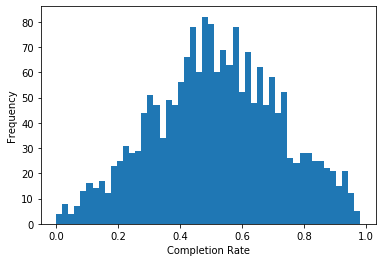

In [13]:
plt.hist(df['C200_4_POOLED_SUPP'], bins=50)
plt.xlabel('Completion Rate')
plt.ylabel('Frequency');

- I decide to focus on analyzing first-time, full-time students at four-year institutions for this project. Therefore the column for less-than-four year institutions is removed
- Data type of the target variable "C200_4_POOLED_SUPP" converted from object to float
- Completion rates seem to be normally distributed

**2. Retention Rate**
<br/>
This would be another target variable group. There are in total four variables under this group:

| Variable ID | Description |
| :--- | :--- |
| RET_FT4 | First-time, full-time student retention rate at four-year institutions |
| RET_FTL4 | First-time, full-time student retention rate at less-than-four-year institutions |
| RET_PT4 | First-time, part-time student retention rate at four-year institutions |
| RET_PTL4 | First-time, part-time student retention rate at less-than-four-year institutions |

In [14]:
retention_rate = ['RET_FT4_POOLED_SUPP', 'RET_FTL4_POOLED_SUPP', 'RET_PT4_POOLED_SUPP', 'RET_PTL4_POOLED_SUPP']

df[retention_rate].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6806 entries, 0 to 6805
Data columns (total 4 columns):
RET_FT4_POOLED_SUPP     1962 non-null object
RET_FTL4_POOLED_SUPP    2943 non-null object
RET_PT4_POOLED_SUPP     675 non-null object
RET_PTL4_POOLED_SUPP    1442 non-null object
dtypes: object(4)
memory usage: 212.8+ KB


In [15]:
df = df.drop(['RET_FTL4_POOLED_SUPP', 'RET_PT4_POOLED_SUPP', 'RET_PTL4_POOLED_SUPP'], axis = 1)

df['RET_FT4_POOLED_SUPP'] = pd.to_numeric(df['RET_FT4_POOLED_SUPP'])

In [16]:
df['RET_FT4_POOLED_SUPP'].describe()

count    1962.000000
mean        0.730958
std         0.139367
min         0.094600
25%         0.653125
50%         0.748550
75%         0.824675
max         0.994000
Name: RET_FT4_POOLED_SUPP, dtype: float64

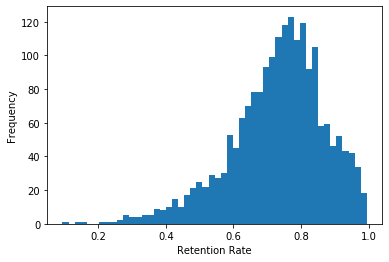

In [17]:
plt.hist(df['RET_FT4_POOLED_SUPP'], bins=50)
plt.xlabel('Retention Rate')
plt.ylabel('Frequency');

- Part-time and less-than-four-year data removed, as this project focuses on full-time students at four-year institutions
- Data type of the target variable "RET_FT4_POOLED_SUPP" converted from object to float
- Plot of retention rate is skewed to the left

**3. Standardized Test Scores**
<br/>
SAT and ACT are two major standardized tests used for college admissions in the United States. There are in total 23 variables under this group:

| Variable ID | Description |
| :--- | :--- |
| SATVR25 | 25th percentile of SAT scores at the institution (critical reading) |
| SATVR75 | 75th percentile of SAT scores at the institution (critical reading) |
| SATMT25 | 25th percentile of SAT scores at the institution (math) |
| SATMT75 | 75th percentile of SAT scores at the institution (math) |
| SATWR25 | 25th percentile of SAT scores at the institution (writing) |
| SATWR75 | 75th percentile of SAT scores at the institution (writing) |
| SATVRMID | Midpoint of SAT scores at the institution (critical reading) |
| SATMTMID | Midpoint of SAT scores at the institution (math) |
| SATWRMID | Midpoint of SAT scores at the institution (writing) |
| SAT_AVG | Average SAT equivalent score of students admitted |
| SAT_AVG_ALL | Average SAT equivalent score of students admitted for all campuses rolled up to the 6-digit OPE ID |
| ACTCM25 | 25th percentile of the ACT cumulative score |
| ACTCM75 | 75th percentile of the ACT cumulative score |
| ACTEN25 | 25th percentile of the ACT English score |
| ACTEN75 | 75th percentile of the ACT English score |
| ACTMT25 | 25th percentile of the ACT math score |
| ACTMT75 | 75th percentile of the ACT math score |
| ACTWR25 | 25th percentile of the ACT writing score |
| ACTWR75 | 75th percentile of the ACT writing score |
| ACTCMMID | Midpoint of the ACT cumulative score |
| ACTENMID | Midpoint of the ACT English score |
| ACTMTMID | Midpoint of the ACT math score |
| ACTWRMID | Midpoint of the ACT writing score |

In [18]:
standardized_test_scores = ['SATVR25', 'SATVR75', 'SATMT25', 'SATMT75', 'SATWR25', 'SATWR75', 'SATVRMID', 'SATMTMID', 
                            'SATWRMID', 'SAT_AVG', 'SAT_AVG_ALL', 'ACTCM25', 'ACTCM75', 'ACTEN25', 'ACTEN75', 
                            'ACTMT25', 'ACTMT75', 'ACTWR25', 'ACTWR75', 'ACTCMMID', 'ACTENMID', 'ACTMTMID', 'ACTWRMID']

df[standardized_test_scores].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6806 entries, 0 to 6805
Data columns (total 23 columns):
SATVR25        1239 non-null float64
SATVR75        1239 non-null float64
SATMT25        1242 non-null float64
SATMT75        1242 non-null float64
SATWR25        732 non-null float64
SATWR75        732 non-null float64
SATVRMID       1239 non-null float64
SATMTMID       1242 non-null float64
SATWRMID       732 non-null float64
SAT_AVG        1298 non-null float64
SAT_AVG_ALL    1426 non-null float64
ACTCM25        1273 non-null float64
ACTCM75        1273 non-null float64
ACTEN25        1199 non-null float64
ACTEN75        1199 non-null float64
ACTMT25        1199 non-null float64
ACTMT75        1199 non-null float64
ACTWR25        325 non-null float64
ACTWR75        325 non-null float64
ACTCMMID       1273 non-null float64
ACTENMID       1199 non-null float64
ACTMTMID       1199 non-null float64
ACTWRMID       325 non-null float64
dtypes: float64(23)
memory usage: 1.2 MB


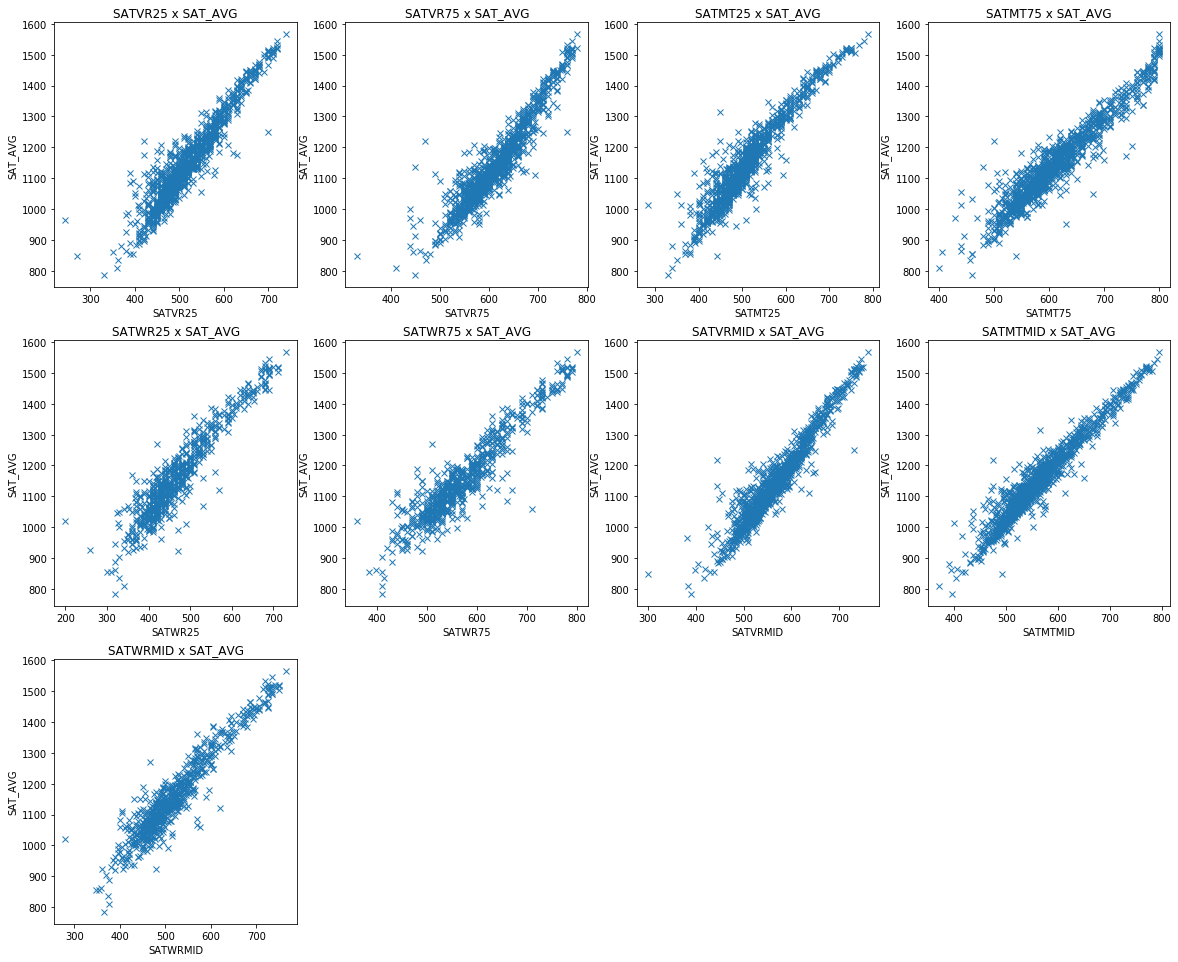

In [19]:
sat = df[['SATVR25', 'SATVR75', 'SATMT25', 'SATMT75', 'SATWR25', 'SATWR75', 'SATVRMID', 'SATMTMID', 'SATWRMID']]

sat_avg = df['SAT_AVG']

plt.figure(figsize=(20, 40))

for i, col in enumerate(sat.columns):
    plt.subplot(7, 4, i+1)
    plt.plot(df[col], sat_avg, 'x')
    plt.title('%s x SAT_AVG' % col)
    plt.xlabel(col)
    plt.ylabel('SAT_AVG')

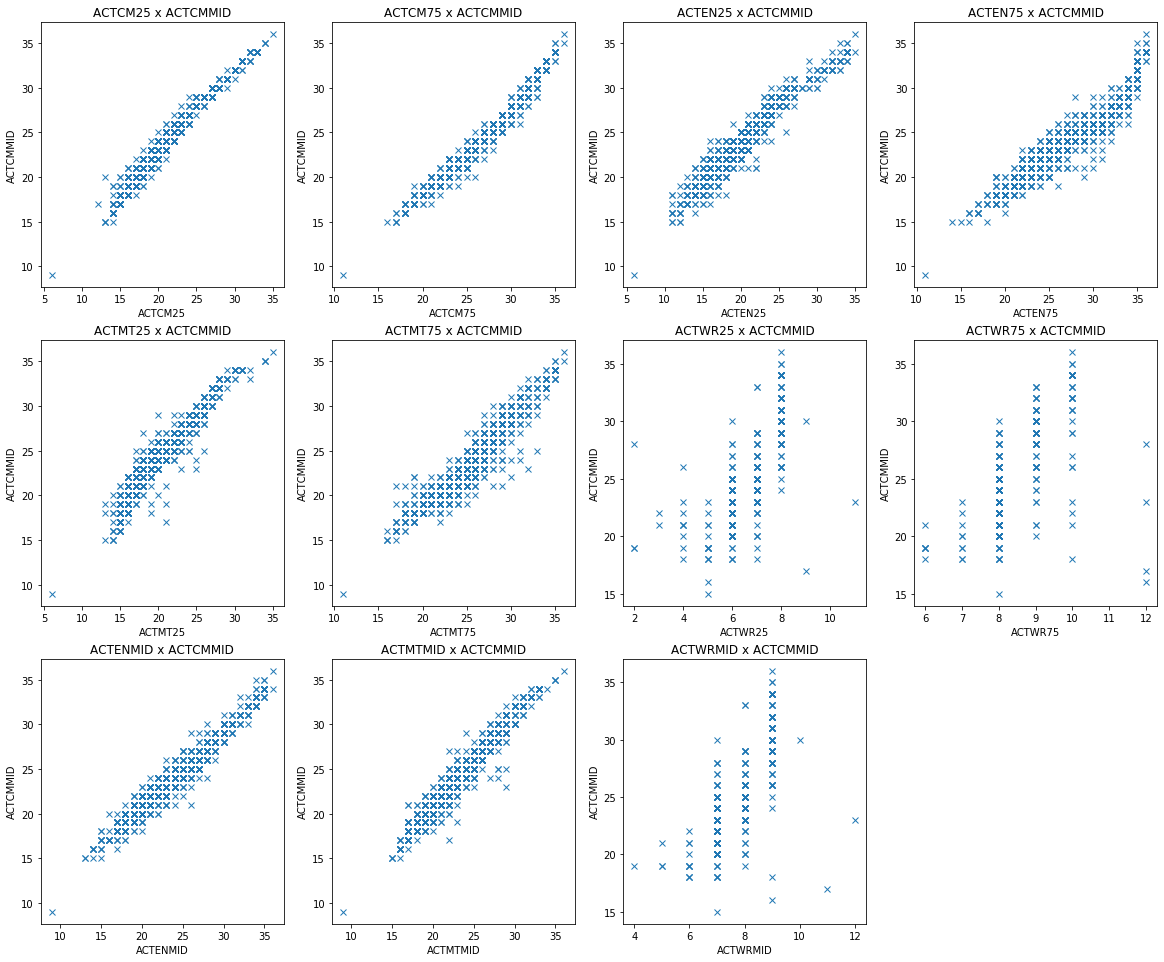

In [20]:
act = df[['ACTCM25', 'ACTCM75', 'ACTEN25', 'ACTEN75', 'ACTMT25', 'ACTMT75', 'ACTWR25', 'ACTWR75', 'ACTENMID', 
          'ACTMTMID', 'ACTWRMID']]

act_cm_mid = df[['ACTCMMID']]

plt.figure(figsize=(20, 40))

for i, col in enumerate(act.columns):
    plt.subplot(7, 4, i+1)
    plt.plot(df[col], act_cm_mid, 'x')
    plt.title('%s x ACTCMMID' % col)
    plt.xlabel(col)
    plt.ylabel('ACTCMMID')

In [21]:
df = df.drop(['SATVR25', 'SATVR75', 'SATMT25', 'SATMT75', 'SATWR25', 'SATWR75', 'SATVRMID', 'SATMTMID', 'SATWRMID', 
         'SAT_AVG_ALL', 'ACTCM25', 'ACTCM75', 'ACTEN25', 'ACTEN75', 'ACTMT25', 'ACTMT75', 'ACTWR25', 'ACTWR75', 
         'ACTENMID', 'ACTMTMID', 'ACTWRMID'], axis=1)

- Average SAT score ("AVG_SAT") is positively correlated to other SAT score by percentile variables 
- Similary, midpoint of the ACT cumulative score ("ACTCMMID") is also positively correlated to other ACT score by percentile variables 
- "AVG_SAT" and "ACTCMMID" selected as two standardized test score variables, as they are not only representative of other variables, but also have fewer non-null values
- Variables other than "AVG_SAT" and "ACTCMMID" removed from the dataset

**4. Student Body**
<br/>
14 variables are under the "Studnet Body" group:

| Variable ID | Description |
| :--- | :--- |
| UG25ABV | Percentage of undergraduates aged 25 and above |
| MENONLY | Flag for men-only college |
| WOMENONLY | Flag for women-only college |
| UGDS | Enrollment of undergraduate certificate/degree-seeking students |
| UGDS_WHITE | Total share of enrollment of undergraduate degree-seeking students who are white |
| UGDS_BLACK | Total share of enrollment of undergraduate degree-seeking students who are black |
| UGDS_HISP | Total share of enrollment of undergraduate degree-seeking students who are Hispanic |
| UGDS_ASIAN | Total share of enrollment of undergraduate degree-seeking students who are Asian |
| UGDS_AIAN | Total share of enrollment of undergraduate degree-seeking students who are American Indian/Alaska Native |
| UGDS_NHPI | Total share of enrollment of undergraduate degree-seeking students who are Native Hawaiian/Pacific Islander |
| UGDS_2MOR | Total share of enrollment of undergraduate degree-seeking students who are two or more races |
| UGDS_NRA | Total share of enrollment of undergraduate degree-seeking students who are non-resident aliens |
| UGDS_UNKN | Total share of enrollment of undergraduate degree-seeking students whose race is unknown |
| PPTUG_EF | Share of undergraduate, degree-/certificate-seeking students who are part-time |

In [22]:
student_body = df[['UG25ABV', 'MENONLY', 'WOMENONLY',  'UGDS', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 
                'UGDS_AIAN', 'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA', 'UGDS_UNKN', 'PPTUG_EF']]

student_body.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6806 entries, 0 to 6805
Data columns (total 14 columns):
UG25ABV       5872 non-null float64
MENONLY       6331 non-null float64
WOMENONLY     6331 non-null float64
UGDS          6041 non-null float64
UGDS_WHITE    6041 non-null float64
UGDS_BLACK    6041 non-null float64
UGDS_HISP     6041 non-null float64
UGDS_ASIAN    6041 non-null float64
UGDS_AIAN     6041 non-null float64
UGDS_NHPI     6041 non-null float64
UGDS_2MOR     6041 non-null float64
UGDS_NRA      6041 non-null float64
UGDS_UNKN     6041 non-null float64
PPTUG_EF      6013 non-null float64
dtypes: float64(14)
memory usage: 744.5 KB


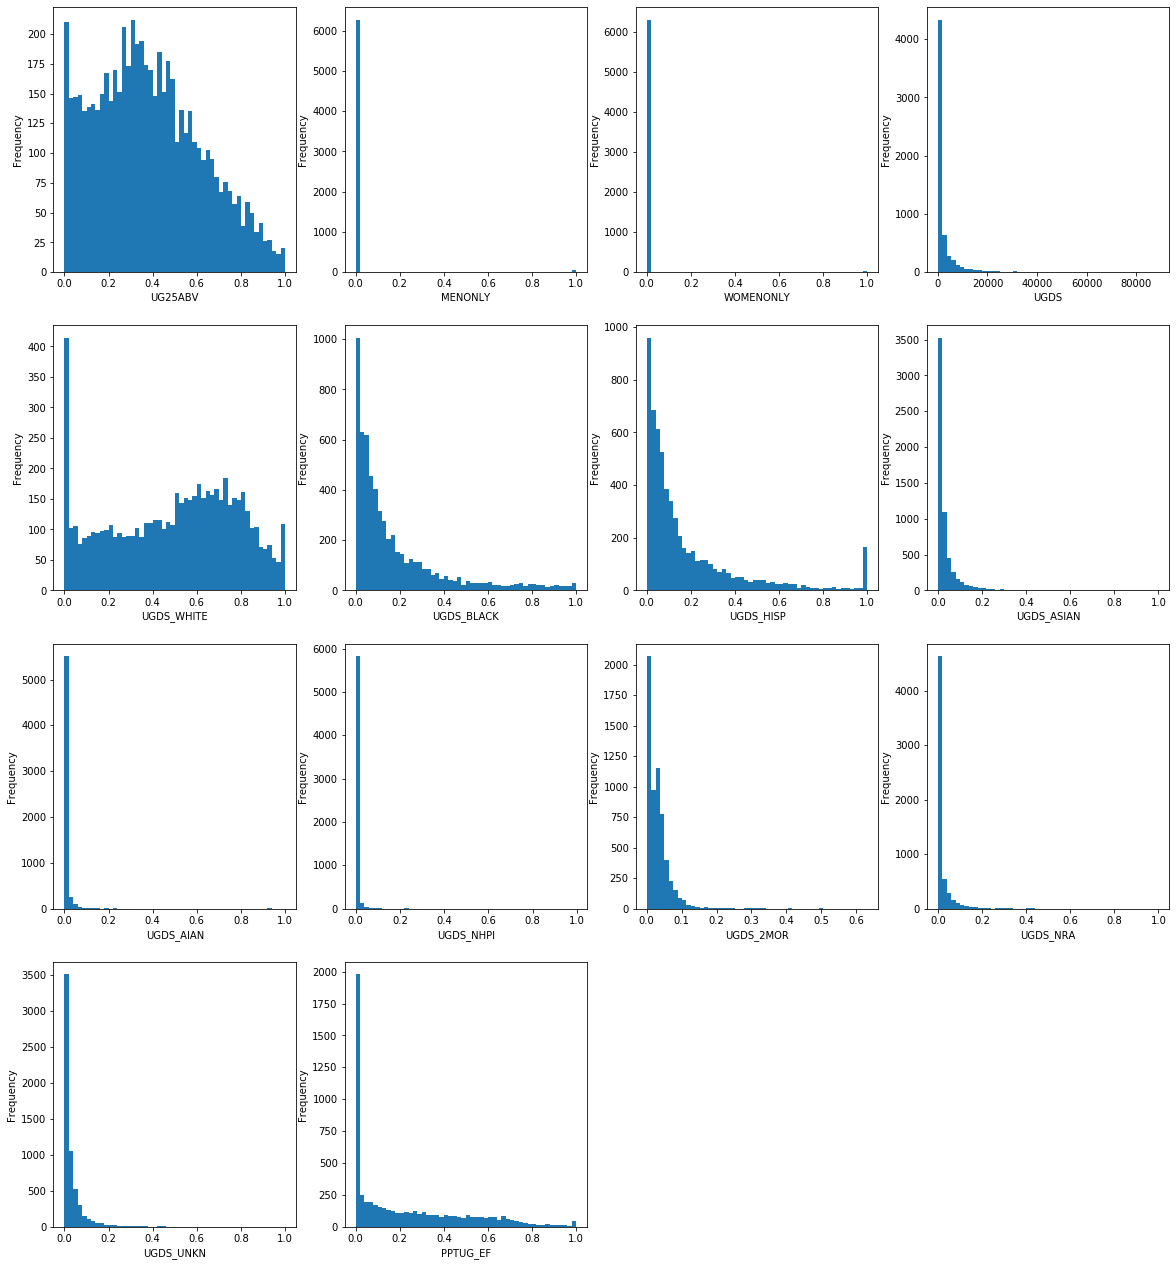

In [23]:
plt.figure(figsize=(20, 40))

for i, col in enumerate(student_body.columns):
    plt.subplot(7, 4, i+1)
    plt.hist(df[col], bins=50)
    plt.xlabel(col)
    plt.ylabel('Frequency');

**5. Net Price**
<br/>
The higher education institutions in this data are required to report information about tuition, fees, and other living costs that together constitute an estimate of the total cost of attending the institution. Institutions also report the average net price for any student receiving grant or scholarship aid from federal, state or local governments, or from the institution. Average net price can then be computed for both this group overall or for students with financial aid only. More accurate affordability information is available by measuring the average net price for students across five income categories for financial aid recipients. There are 12 variables under this group :

| Variable ID | Description |
| :--- | :--- |
| NPT4_PUB | Average net price for Title IV institutions (public institutions) |
| NPT4_PRIV | Average net price for Title IV institutions (private for-profit and nonprofit institutions) |
| NPT41_PUB | Average net price for USD 0 - 30,000 family income (public institutions) |
| NPT42_PUB | Average net price for USD 30,001 - 48,000 family income (public institutions) |
| NPT43_PUB | Average net price for USD 48,001 - 75,000 family income (public institutions) |
| NPT44_PUB | Average net price for USD 75,001 - 110,000 family income (public institutions) |
| NPT45_PUB | Average net price for USD 110,000+ family income (public institutions) |
| NPT41_PRIV | Average net price for USD 0 - 30,000 family income (private for-profit and nonprofit institutions) |
| NPT42_PRIV | Average net price for USD 30,001 - 48,000 family income (private for-profit and nonprofit institutions) |
| NPT43_PRIV | Average net price for USD 48,001 - 75,000 family income (private for-profit and nonprofit institutions) |
| NPT44_PRIV | Average net price for USD 75,001 - 110,000 family income (private for-profit and nonprofit institutions) |
| NPT45_PRIV | Average net price for USD 110,000+ family income (private for-profit and nonprofit institutions) |

In [24]:
net_price = df[['NPT4_PUB', 'NPT4_PRIV', 'NPT41_PUB', 'NPT42_PUB', 'NPT43_PUB', 'NPT44_PUB', 'NPT45_PUB', 'NPT41_PRIV',
             'NPT42_PRIV', 'NPT43_PRIV', 'NPT44_PRIV', 'NPT45_PRIV']]

net_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6806 entries, 0 to 6805
Data columns (total 12 columns):
NPT4_PUB      1878 non-null float64
NPT4_PRIV     3727 non-null float64
NPT41_PUB     1869 non-null float64
NPT42_PUB     1795 non-null float64
NPT43_PUB     1745 non-null float64
NPT44_PUB     1559 non-null float64
NPT45_PUB     1338 non-null float64
NPT41_PRIV    3661 non-null float64
NPT42_PRIV    2944 non-null float64
NPT43_PRIV    2669 non-null float64
NPT44_PRIV    2172 non-null float64
NPT45_PRIV    1814 non-null float64
dtypes: float64(12)
memory usage: 638.2 KB


In [25]:
df = df.drop(['NPT41_PUB', 'NPT42_PUB', 'NPT43_PUB', 'NPT44_PUB', 'NPT45_PUB', 'NPT41_PRIV', 'NPT42_PRIV', 
              'NPT43_PRIV', 'NPT44_PRIV', 'NPT45_PRIV'], axis=1)

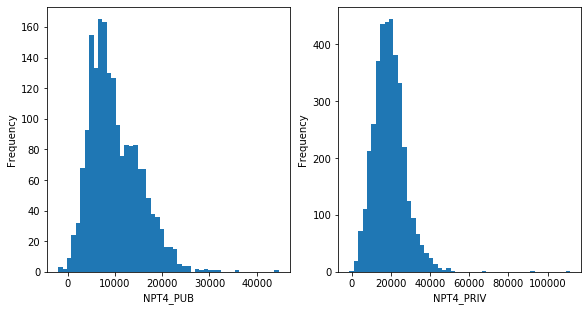

In [26]:
plt.figure(figsize=(20, 40))

for i, col in enumerate(['NPT4_PUB', 'NPT4_PRIV']):
    plt.subplot(7, 4, i+1)
    plt.hist(df[col], bins=50)
    plt.xlabel(col)
    plt.ylabel('Frequency');

- I decide to use average net price for public and private institutions ("NPT4_PUB", "NPT4_PRIV") as features for the Net Price group. Other variables removed

**6. Percentage of Degrees Awarded**
<br/>
Percentage of degrees awarded in 38 subjects of study:

| Variable ID | Description (Percentage of Degrees Awarded in) |
| :--- | :--- |
| PCIP01 | Agriculture, Agriculture Operations, And Related Sciences |
| PCIP03 | Natural Resources And Conservation |
| PCIP04 | Architecture And Related Services |
| PCIP05 | Area, Ethnic, Cultural, Gender, And Group Studies |
| PCIP09 | Communication, Journalism, And Related Programs |
| PCIP10 | Communications Technologies/Technicians And Support Services |
| PCIP11 | Computer And Information Sciences And Support Services |
| PCIP12 | Personal And Culinary Services |
| PCIP13 | Education |
| PCIP14 | Engineering |
| PCIP15 | Engineering Technologies And Engineering-Related Fields |
| PCIP16 | Foreign Languages, Literatures, And Linguistics |
| PCIP19 | Family And Consumer Sciences/Human Sciences |
| PCIP22 | Legal Professions And Studies |
| PCIP23 | English Language And Literature/Letters |
| PCIP24 | Liberal Arts And Sciences, General Studies And Humanities |
| PCIP25 | Library Science |
| PCIP26 | Biological And Biomedical Sciences |
| PCIP27 | Mathematics And Statistics |
| PCIP29 | Military Technologies And Applied Sciences |
| PCIP30 | Multi/Interdisciplinary Studies |
| PCIP31 | Parks, Recreation, Leisure, And Fitness Studies |
| PCIP38 | Philosophy And Religious Studies |
| PCIP39 | Theology And Religious Vocations |
| PCIP40 | Physical Sciences |
| PCIP41 | Science Technologies/Technicians |
| PCIP42 | Psychology |
| PCIP43 | Homeland Security, Law Enforcement, Firefighting And Related Protective Services |
| PCIP44 | Public Administration And Social Service Professions |
| PCIP45 | Social Sciences |
| PCIP46 | Construction Trades |
| PCIP47 | Mechanic And Repair Technologies/Technicians |
| PCIP48 | Precision Production |
| PCIP49 | Transportation And Materials Moving |
| PCIP50 | Visual And Performing Arts |
| PCIP51 | Health Professions And Related Programs |
| PCIP52 | Business, Management, Marketing, And Related Support Services |
| PCIP54 | History |

In [27]:
percentage_degrees_awarded = df[['PCIP01', 'PCIP03', 'PCIP04', 'PCIP05', 'PCIP09', 'PCIP10', 'PCIP11', 'PCIP12',
                              'PCIP13', 'PCIP14', 'PCIP15', 'PCIP16', 'PCIP19', 'PCIP22', 'PCIP23', 'PCIP24',
                              'PCIP25', 'PCIP26', 'PCIP27', 'PCIP29', 'PCIP30', 'PCIP31', 'PCIP38', 'PCIP39',
                              'PCIP40', 'PCIP41', 'PCIP42', 'PCIP43', 'PCIP44', 'PCIP45', 'PCIP46', 'PCIP47',
                              'PCIP48', 'PCIP49', 'PCIP50', 'PCIP51', 'PCIP52', 'PCIP54']]

percentage_degrees_awarded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6806 entries, 0 to 6805
Data columns (total 38 columns):
PCIP01    6036 non-null float64
PCIP03    6036 non-null float64
PCIP04    6036 non-null float64
PCIP05    6036 non-null float64
PCIP09    6036 non-null float64
PCIP10    6036 non-null float64
PCIP11    6036 non-null float64
PCIP12    6036 non-null float64
PCIP13    6036 non-null float64
PCIP14    6036 non-null float64
PCIP15    6036 non-null float64
PCIP16    6036 non-null float64
PCIP19    6036 non-null float64
PCIP22    6036 non-null float64
PCIP23    6036 non-null float64
PCIP24    6036 non-null float64
PCIP25    6036 non-null float64
PCIP26    6036 non-null float64
PCIP27    6036 non-null float64
PCIP29    6036 non-null float64
PCIP30    6036 non-null float64
PCIP31    6036 non-null float64
PCIP38    6036 non-null float64
PCIP39    6036 non-null float64
PCIP40    6036 non-null float64
PCIP41    6036 non-null float64
PCIP42    6036 non-null float64
PCIP43    6036 non-null float

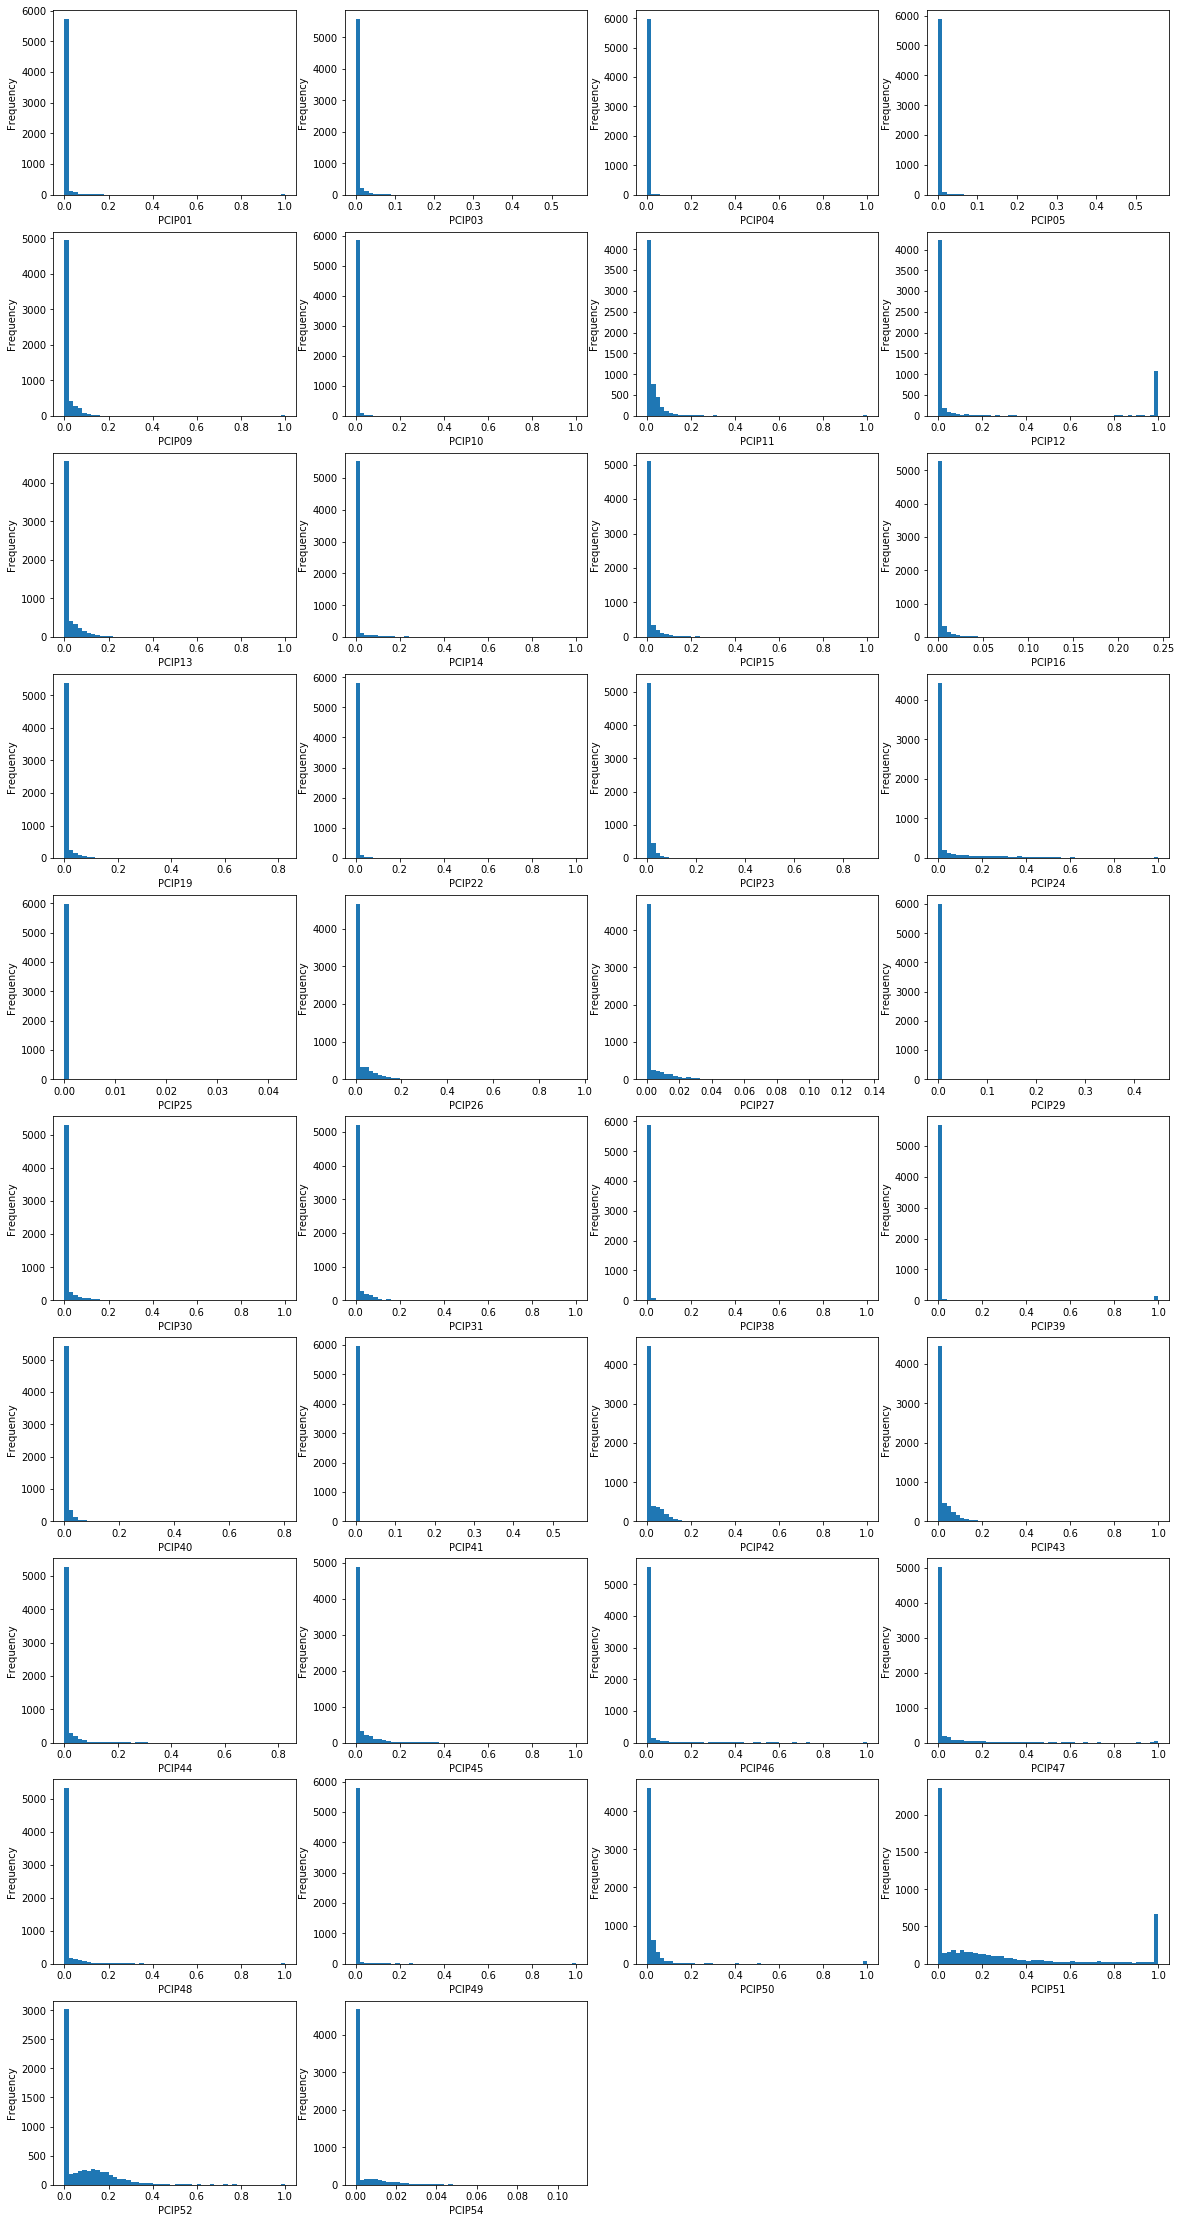

In [28]:
plt.figure(figsize=(20, 40))

for i, col in enumerate(percentage_degrees_awarded.columns):
    plt.subplot(10, 4, i+1)
    plt.hist(df[col], bins=50)
    plt.xlabel(col)
    plt.ylabel('Frequency');

**7. Student Finance**
<br/>
Features in this group provides an overview of student finance in the United States. Specifically, there is information about how much students might need to borrow to borrow to attend various institutions and how likely they will be able to repay those loans once they leave college. There are in total five variables:

| Variable ID | Description |
| :--- | :--- |
| PCTPELL | Percentage of undergraduates who receive a Pell Grant |
| PCTFLOAN | Percent of all undergraduate students receiving a federal student loan |
| GRAD_DEBT_MDN_SUPP | Median debt of completers |
| GRAD_DEBT_MDN10YR_SUPP | Median debt of completers expressed in 10-year monthly payments |
| RPY_3YR_RT_SUPP | 3-year repayment rate |

In [29]:
student_finance = df[['PCTPELL', 'PCTFLOAN', 'GRAD_DEBT_MDN_SUPP', 'GRAD_DEBT_MDN10YR_SUPP', 'RPY_3YR_RT_SUPP']]

student_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6806 entries, 0 to 6805
Data columns (total 5 columns):
PCTPELL                   6014 non-null float64
PCTFLOAN                  6014 non-null float64
GRAD_DEBT_MDN_SUPP        5142 non-null object
GRAD_DEBT_MDN10YR_SUPP    5142 non-null object
RPY_3YR_RT_SUPP           5239 non-null object
dtypes: float64(2), object(3)
memory usage: 266.0+ KB


In [30]:
student_finance_object = ['GRAD_DEBT_MDN_SUPP', 'GRAD_DEBT_MDN10YR_SUPP', 'RPY_3YR_RT_SUPP']

for i in student_finance_object:
    df[i] = pd.to_numeric(df[i], errors='coerce')

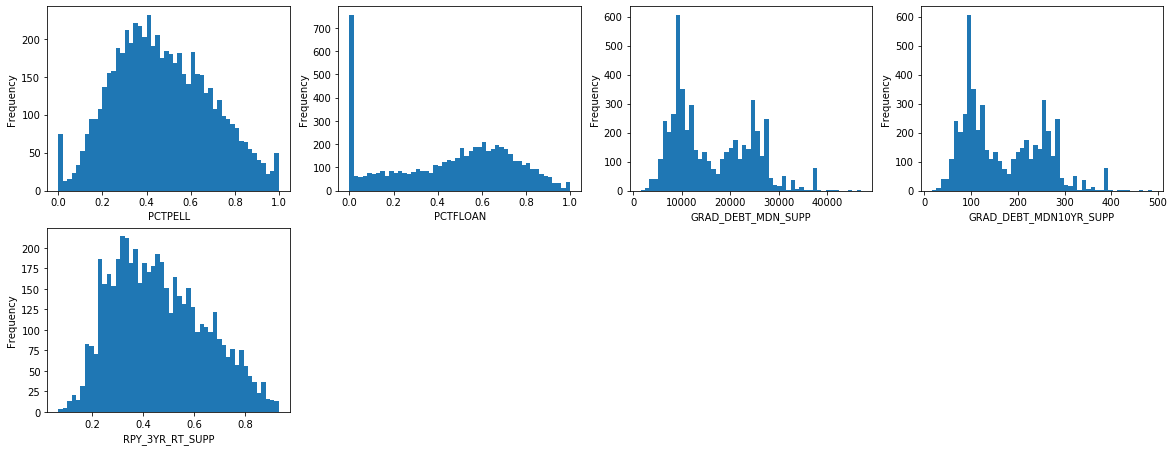

In [31]:
plt.figure(figsize=(20, 40))

for i, col in enumerate(student_finance.columns):
    plt.subplot(10, 4, i+1)
    plt.hist(df[col], bins=50)
    plt.xlabel(col)
    plt.ylabel('Frequency');

- Three variables "GRAD_DEBT_MDN_SUPP", "GRAD_DEBT_MDN10YR_SUPP" and "RPY_3YR_RT_SUPP" converted to float data type

**8. Student Earning after Graduation**
<br/>

| Variable ID | Description |
| :--- | :--- |
| MD_EARN_WNE_P10 | Median earnings of students working and not enrolled 10 years after entry |

In [32]:
student_earning = df[['MD_EARN_WNE_P10']]

student_earning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6806 entries, 0 to 6805
Data columns (total 1 columns):
MD_EARN_WNE_P10    4817 non-null object
dtypes: object(1)
memory usage: 53.3+ KB


In [33]:
df['MD_EARN_WNE_P10'] = pd.to_numeric(df['MD_EARN_WNE_P10'], errors='coerce')

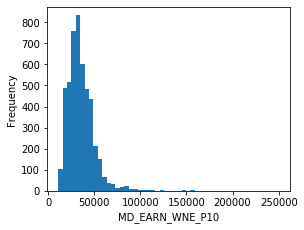

In [34]:
plt.figure(figsize=(20, 40))

for i, col in enumerate(student_earning.columns):
    plt.subplot(10, 4, i+1)
    plt.hist(df[col], bins=50)
    plt.xlabel(col)
    plt.ylabel('Frequency');

**9. Academics**
<br/>
Five academic features of the institutions in the dataset are provided:

| Variable ID | Description |
| :--- | :--- |
| PREDDEG | Predominant undergraduate degree awarded |
| | 0 Not classified |
| | 1 Predominantly certificate-degree granting |
| | 2 Predominantly associate's-degree granting |
| | 3 Predominantly bachelor's-degree granting |
| | 4 Entirely graduate-degree granting |
| HIGHDEG | Highest degree awarded |
| |  0 Non-degree-granting |
| |  1 Certificate degree |
| |  2 Associate degree |
| |  3 Bachelor's degree |
| |  4 Graduate degree |
| DISTANCEONLY | Flag for distance-education-only education |
| | 0 No |
| | 1 Yes |
| PRGMOFR | Number of programs offered |
| CONTROL | Control of institution |
|  | 1 Public |
|  | 2 Private nonprofit |
|  | 3 Private for-profit |

In [35]:
academics = df[['PREDDEG', 'HIGHDEG', 'DISTANCEONLY', 'PRGMOFR', 'CONTROL']]

academics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6806 entries, 0 to 6805
Data columns (total 5 columns):
PREDDEG         6806 non-null int64
HIGHDEG         6806 non-null int64
DISTANCEONLY    6331 non-null float64
PRGMOFR         2323 non-null float64
CONTROL         6806 non-null int64
dtypes: float64(2), int64(3)
memory usage: 266.0 KB


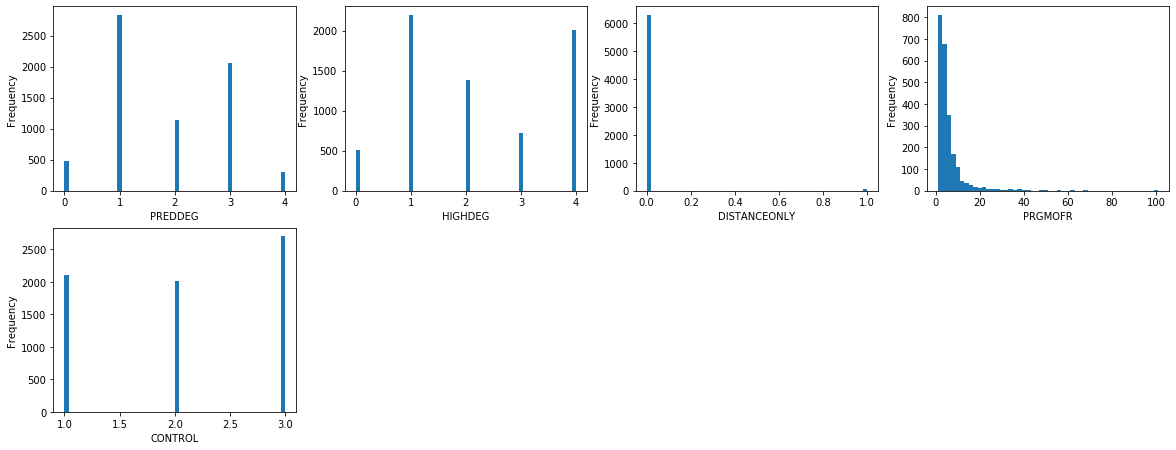

In [36]:
plt.figure(figsize=(20, 40))

for i, col in enumerate(academics.columns):
    plt.subplot(10, 4, i+1)
    plt.hist(df[col], bins=50)
    plt.xlabel(col)
    plt.ylabel('Frequency');

In [37]:
df[['PREDDEG_non', 'PREDDEG_certificate', 'PREDDEG_associate', 
    'PREDDEG_bachelor', 'PREDDEG_graduate']] = pd.get_dummies(df.PREDDEG)

df[['HIGHDEG_not_classified', 'HIGHDEG_certificate', 'HIGHDEG_associate', 
    'HIGHDEG_bachelor', 'HIGHDEG_graduate']] = pd.get_dummies(df.HIGHDEG)

df[['CONTROL_public', 'CONTROL_private_nonprofit', 'CONTROL_private_for_profit']] = pd.get_dummies(df.CONTROL)

df = df.drop(['PREDDEG', 'CONTROL', 'HIGHDEG'], axis = 1)

- Dummy variables created for columns with categorical variables
- Columns with categorical variables removed from the dataset

**10. Time**
<br/>
Time needed to complete program:

| Variable ID | Description |
| :--- | :--- |
| MTHCMP1 | Average number of months needed to complete largest program |
| MTHCMP2 | Average number of months needed to complete program #2 |
| MTHCMP3 | Average number of months needed to complete program #3 |
| MTHCMP4 | Average number of months needed to complete program #4 |
| MTHCMP5 | Average number of months needed to complete program #5 |
| MTHCMP6 | Average number of months needed to complete program #6 |

In [38]:
time = df[['MTHCMP1', 'MTHCMP2', 'MTHCMP3', 'MTHCMP4', 'MTHCMP5', 'MTHCMP6']]

time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6806 entries, 0 to 6805
Data columns (total 6 columns):
MTHCMP1    2403 non-null float64
MTHCMP2    1910 non-null float64
MTHCMP3    1514 non-null float64
MTHCMP4    1159 non-null float64
MTHCMP5    839 non-null float64
MTHCMP6    638 non-null float64
dtypes: float64(6)
memory usage: 319.2 KB


In [39]:
time_program = df[['MTHCMP2', 'MTHCMP3', 'MTHCMP4', 'MTHCMP5', 'MTHCMP6']]

time_program1 = df[['MTHCMP1']]

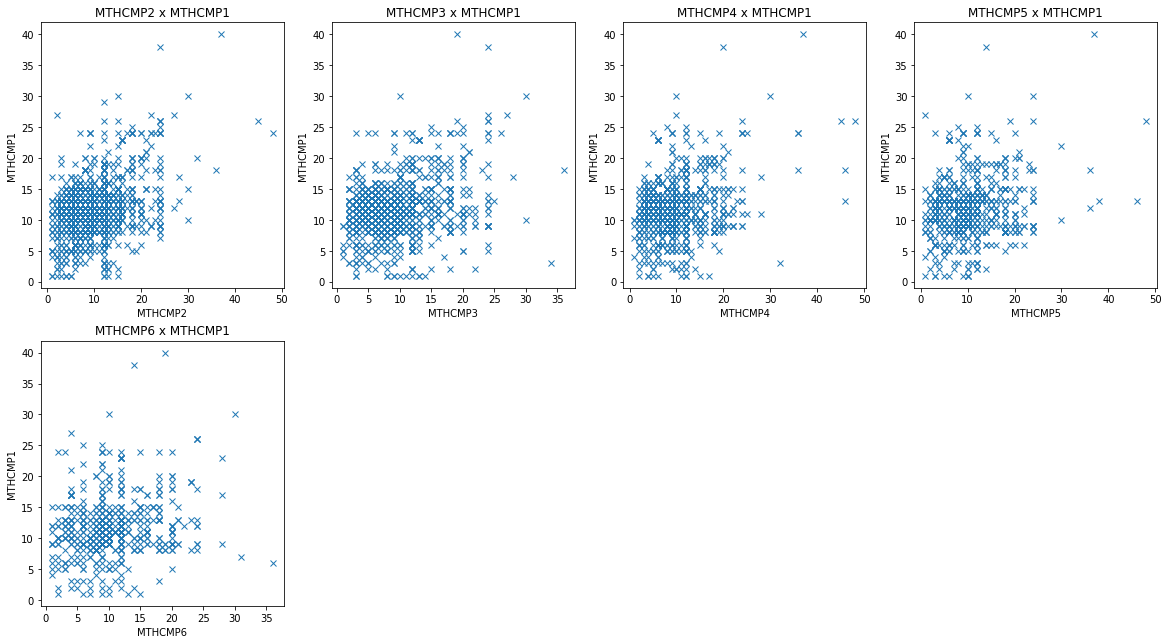

In [40]:
plt.figure(figsize=(20, 40))

for i, col in enumerate(time_program.columns):
    plt.subplot(7, 4, i+1)
    plt.plot(df[col], time_program1, 'x')
    plt.title('%s x MTHCMP1' % col)
    plt.xlabel(col)
    plt.ylabel('MTHCMP1')

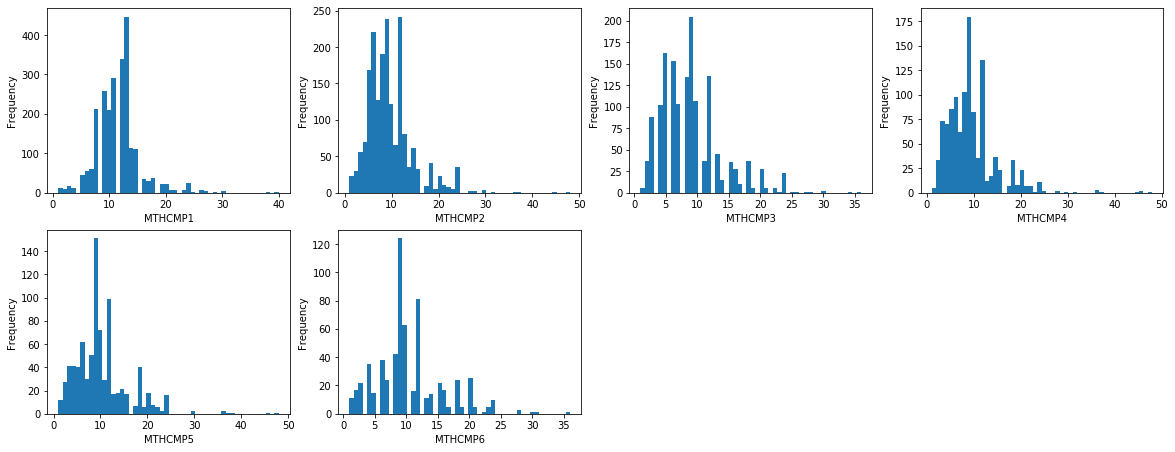

In [41]:
plt.figure(figsize=(20, 40))

for i, col in enumerate(time.columns):
    plt.subplot(10, 4, i+1)
    plt.hist(df[col], bins=50)
    plt.xlabel(col)
    plt.ylabel('Frequency');

- No specific correlation found between time needed for largest program and other programs

## Methodology
***

### Data Preprocessing

In [42]:
df_ret = df.dropna(subset=['RET_FT4_POOLED_SUPP'])

df_ret = df_ret.drop(['C200_4_POOLED_SUPP'], axis = 1)

for col in df_ret[df_ret.columns]:
    df_ret[col].fillna(value=df_ret[col].median(), inplace=True)

- A subset "df_ret" created in which rows with null values in the column for rerention rate ("RET_FT4_POOLED_SUPP") are removed
- Target variable for completion rate ("C200_4_POOLED_SUPP") removed from the "df_ret" dataset
- Null values in other columns in the "df_ret" dataset replaced with the median value of the column

In [43]:
df_com = df.dropna(subset=['C200_4_POOLED_SUPP'])

df_com = df_com.drop(['RET_FT4_POOLED_SUPP'], axis = 1)

for col in df_com[df_com.columns]:
    df_com[col].fillna(value=df_com[col].median(), inplace=True)

- A subset "df_com" created in which rows with null values in the column for completion (graduation) rate ("C200_4_POOLED_SUPP") are removed
- Target variable for retention rate ("RET_FT4_POOLED_SUPP") removed from the "df_com" dataset
- Null values in other columns in the "df_com" dataset replaced with the median value of the column

In [44]:
target_com = df_com[['C200_4_POOLED_SUPP']]
features_com = df_com.drop(['C200_4_POOLED_SUPP'], axis = 1)

target_ret = df_ret[['RET_FT4_POOLED_SUPP']]
features_ret = df_ret.drop(['RET_FT4_POOLED_SUPP'], axis = 1)

- Data for the two target variables saved as "target_com" and "target_ret"
- Data for features corresponding to the two targets saved as "features_com" and "features_ret"

In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features_com[features_com.columns] = scaler.fit_transform(features_com)
features_ret[features_ret.columns] = scaler.fit_transform(features_ret)

- Min-Max Normalization applied to all "features" variables

In [46]:
from sklearn.model_selection import train_test_split

X_train_com, X_test_com, y_train_com, y_test_com = train_test_split(features_com, target_com, 
                                                                    test_size=0.2, random_state=42)

X_train_ret, X_test_ret, y_train_ret, y_test_ret = train_test_split(features_ret, target_ret, 
                                                                    test_size=0.2, random_state=42)

- Split the two datasets into training and testing subsets

### Implementation

### 1. Decision Tree Regressor

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

#### Completion Rate

In [48]:
clf_A = DecisionTreeRegressor(random_state=42)
clf_A.fit(X_train_com, y_train_com)
com_pred = clf_A.predict(X_test_com)
print("Decision Tree r2_score for completion rate:", r2_score(y_test_com, com_pred))

Decision Tree r2_score for completion rate: 0.5262572021732659


#### Retention Rate

In [49]:
clf_A = DecisionTreeRegressor(random_state=42)
clf_A.fit(X_train_ret, y_train_ret)
ret_pred = clf_A.predict(X_test_ret)
print("Decision Tree r2_score for retention rate:", r2_score(y_test_ret, ret_pred))

Decision Tree r2_score for retention rate: 0.15275155641345672


### 2. AdaBoost Regressor

In [50]:
from sklearn.ensemble import AdaBoostRegressor

#### Completion Rate

In [51]:
clf_B = AdaBoostRegressor(random_state=42)
clf_B.fit(X_train_com, y_train_com)
com_pred = clf_B.predict(X_test_com)
print("AdaBoost Regressor r2_score for completion rate:", r2_score(y_test_com, com_pred))

AdaBoost Regressor r2_score for completion rate: 0.6540530897516798


#### Retention Rate

In [52]:
clf_B = AdaBoostRegressor(random_state=42)
clf_B.fit(X_train_ret, y_train_ret)
ret_pred = clf_B.predict(X_test_ret)
print("AdaBoost Regressor r2_score for retention rate:", r2_score(y_test_ret, ret_pred))

AdaBoost Regressor r2_score for retention rate: 0.39611421326344987


### 3. Gradient Boosting Regressor

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

#### Completion Rate

In [54]:
clf_C = GradientBoostingRegressor(random_state=42)
clf_C.fit(X_train_com, y_train_com)
com_pred = clf_C.predict(X_test_com)
print("Gradient Boosting Regressor r2_score for completion rate:", r2_score(y_test_com, com_pred))

Gradient Boosting Regressor r2_score for completion rate: 0.7573014847267215


#### Retention Rate

In [55]:
clf_C = GradientBoostingRegressor(random_state=42)
clf_C.fit(X_train_ret, y_train_ret)
ret_pred = clf_C.predict(X_test_ret)
print("Gradient Boosting Regressor r2_score for retention rate:", r2_score(y_test_ret, ret_pred))

Gradient Boosting Regressor r2_score for retention rate: 0.6492746488021095


### 4. Random Forest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor

#### Completion Rate

In [57]:
clf_E = RandomForestRegressor(random_state=42)
clf_E.fit(X_train_com, y_train_com)
com_pred = clf_E.predict(X_test_com)
print("Random Forest Regressor r2_score for completion rate:", r2_score(y_test_com, com_pred))

Random Forest Regressor r2_score for completion rate: 0.721865795812358


#### Retention Rate

In [58]:
clf_E = RandomForestRegressor(random_state=42)
clf_E.fit(X_train_ret, y_train_ret)
ret_pred = clf_E.predict(X_test_ret)
print("Random Forest Regressor r2_score for retention rate:", r2_score(y_test_ret, ret_pred))

Random Forest Regressor r2_score for retention rate: 0.5860404340796663


### Score Table

| Model | Completion Rate R2 Score | Retention Rate R2 Score |
| :--- | :--- |:--- |
| Decision Tree | 0.526 | 0.152 |
| AdaBoost | 0.654 | 0.396 |
| Gradient Boosting | 0.757 | 0.649 |
| Random Forest | 0.721 | 0.586 |

- The two data sets trained in four models
- Regardless of the model, the data for completion rate always have higher R2 score than that of retention rate
- Gradient Boosting model has the best score for Completion Rate data and Retention Rate data

### Refinement

#### Completion Rate

In [59]:
from sklearn.model_selection import RandomizedSearchCV

clf = GradientBoostingRegressor(random_state=42)

param_grid = {
    "n_estimators": np.arange(30, 120, 10),
    "learning_rate": np.arange(0.05, 0.25, 0.05),
    "max_depth": np.arange(1, 10, 1)
}

grid_search = RandomizedSearchCV(clf, param_grid, scoring="r2", random_state=42)
grid_search.fit(X_train_com, y_train_com)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                       

In [60]:
print("Parameters of best Regressor for Completion Rate : {}".format(grid_search.best_params_))

Parameters of best Regressor for Completion Rate : {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.15000000000000002}


#### Retention Rate

In [61]:
from sklearn.model_selection import RandomizedSearchCV

clf = GradientBoostingRegressor(random_state=42)

param_grid = {
    "n_estimators": np.arange(30, 120, 10),
    "learning_rate": np.arange(0.05, 0.25, 0.05),
    "max_depth": np.arange(1, 10, 1)
}

grid_search = RandomizedSearchCV(clf, param_grid, scoring="r2", random_state=42)
grid_search.fit(X_train_ret, y_train_ret)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                       

In [62]:
print("Parameters of best Regressor for Retention Rate : {}".format(grid_search.best_params_))

Parameters of best Regressor for Retention Rate : {'n_estimators': 30, 'max_depth': 4, 'learning_rate': 0.1}


## Results
***

### Model Evaluation and Validation

Features of best model after tuning for Completion Rate:
- learning_rate = 0.15
- n_estimators = 100
- max_depth = 4

Features of best model after tuning for Retention Rate:
- learning_rate = 0.1
- n_estimators = 70
- max_depth = 3

### Justification

| Model | Completion Rate R2 Score | Retention Rate R2 Score |
| :--- | :--- | :--- |
| Decision Tree Regressor (Benchmark) | 0.526 | 0.152 |
| Gradient Boosting Regressor | 0.757 |0.649 |
| Gradient Boosting Regressor after tuning | 0.759 |0.652|


<br/>
Based on the improvements recorded above, the final tuning model can be deemed as a satisfactory solution.

## Conclusion
***

### Free-Form Visualization

### Feature Importance for Comepltion Rate Data

In [63]:
model_com = GradientBoostingRegressor(learning_rate=0.15, n_estimators=100, max_depth=4, random_state=42)
model_com.fit(X_train_com, y_train_com)
features = features_com.columns
print("Features sorted by their score:")
result_com = sorted(zip(map(lambda x: round(x, 4), model_com.feature_importances_), features), reverse=True)
result_com

Features sorted by their score:


[(0.5198, 'RPY_3YR_RT_SUPP'),
 (0.0657, 'SAT_AVG'),
 (0.0512, 'ACTCMMID'),
 (0.0416, 'PCTPELL'),
 (0.0385, 'UGDS_ASIAN'),
 (0.0321, 'UG25ABV'),
 (0.0231, 'MD_EARN_WNE_P10'),
 (0.023, 'UGDS'),
 (0.0209, 'PCIP50'),
 (0.0174, 'PPTUG_EF'),
 (0.0153, 'PCIP38'),
 (0.0145, 'NPT4_PRIV'),
 (0.0102, 'PCTFLOAN'),
 (0.0088, 'GRAD_DEBT_MDN_SUPP'),
 (0.0086, 'PCIP45'),
 (0.008, 'PCIP52'),
 (0.0077, 'UNITID'),
 (0.0059, 'UGDS_AIAN'),
 (0.0058, 'PCIP27'),
 (0.0052, 'CONTROL_private_nonprofit'),
 (0.0048, 'GRAD_DEBT_MDN10YR_SUPP'),
 (0.0038, 'PCIP24'),
 (0.0038, 'PCIP22'),
 (0.0037, 'PCIP51'),
 (0.0035, 'PCIP09'),
 (0.0034, 'UGDS_BLACK'),
 (0.0032, 'UGDS_UNKN'),
 (0.0029, 'UGDS_WHITE'),
 (0.0029, 'PCIP31'),
 (0.0028, 'UGDS_HISP'),
 (0.0028, 'HIGHDEG_graduate'),
 (0.0027, 'PCIP42'),
 (0.0025, 'PCIP11'),
 (0.0024, 'UGDS_NHPI'),
 (0.0023, 'UGDS_NRA'),
 (0.0023, 'PCIP05'),
 (0.0022, 'PCIP43'),
 (0.0022, 'PCIP40'),
 (0.0021, 'UGDS_2MOR'),
 (0.0021, 'NPT4_PUB'),
 (0.0019, 'PCIP12'),
 (0.0018, 'MTHCMP5'),
 (0

In [64]:
top10_com = ['RPY_3YR_RT_SUPP', 'SAT_AVG', 'ACTCMMID', 'PCTPELL', 'UGDS_ASIAN', 
             'UG25ABV', 'MD_EARN_WNE_P10', 'UGDS', 'PCIP50', 'PPTUG_EF']

|Rank| Variable ID | Description (Percentage of Degrees Awarded in) |
| :--- | :--- |:--- |
| 1 | RPY_3YR_RT_SUPP | 3-year repayment rate |
| 2 | SAT_AVG | Average SAT equivalent score of students admitted|
| 3 | ACTCMMID | Midpoint of the ACT cumulative score |
| 4 | PCTPELL | Percentage of undergraduates who receive a Pell Grant |
| 5 | UGDS_ASIAN | Total share of enrollment of undergraduate degree-seeking students who are Asian |
| 6 | UG25ABV | Percentage of undergraduates aged 25 and above |
| 7 | MD_EARN_WNE_P10 | Median earnings of students working and not enrolled 10 years after entry |
| 8 | UGDS | Enrollment of undergraduate certificate/degree-seeking students|
| 9 | PCIP50 | Percentage of Degrees Awarded in Visual And Performing Arts|
| 10 | PPTUG_EF | Share of undergraduate, degree-/certificate-seeking students who are part-time |

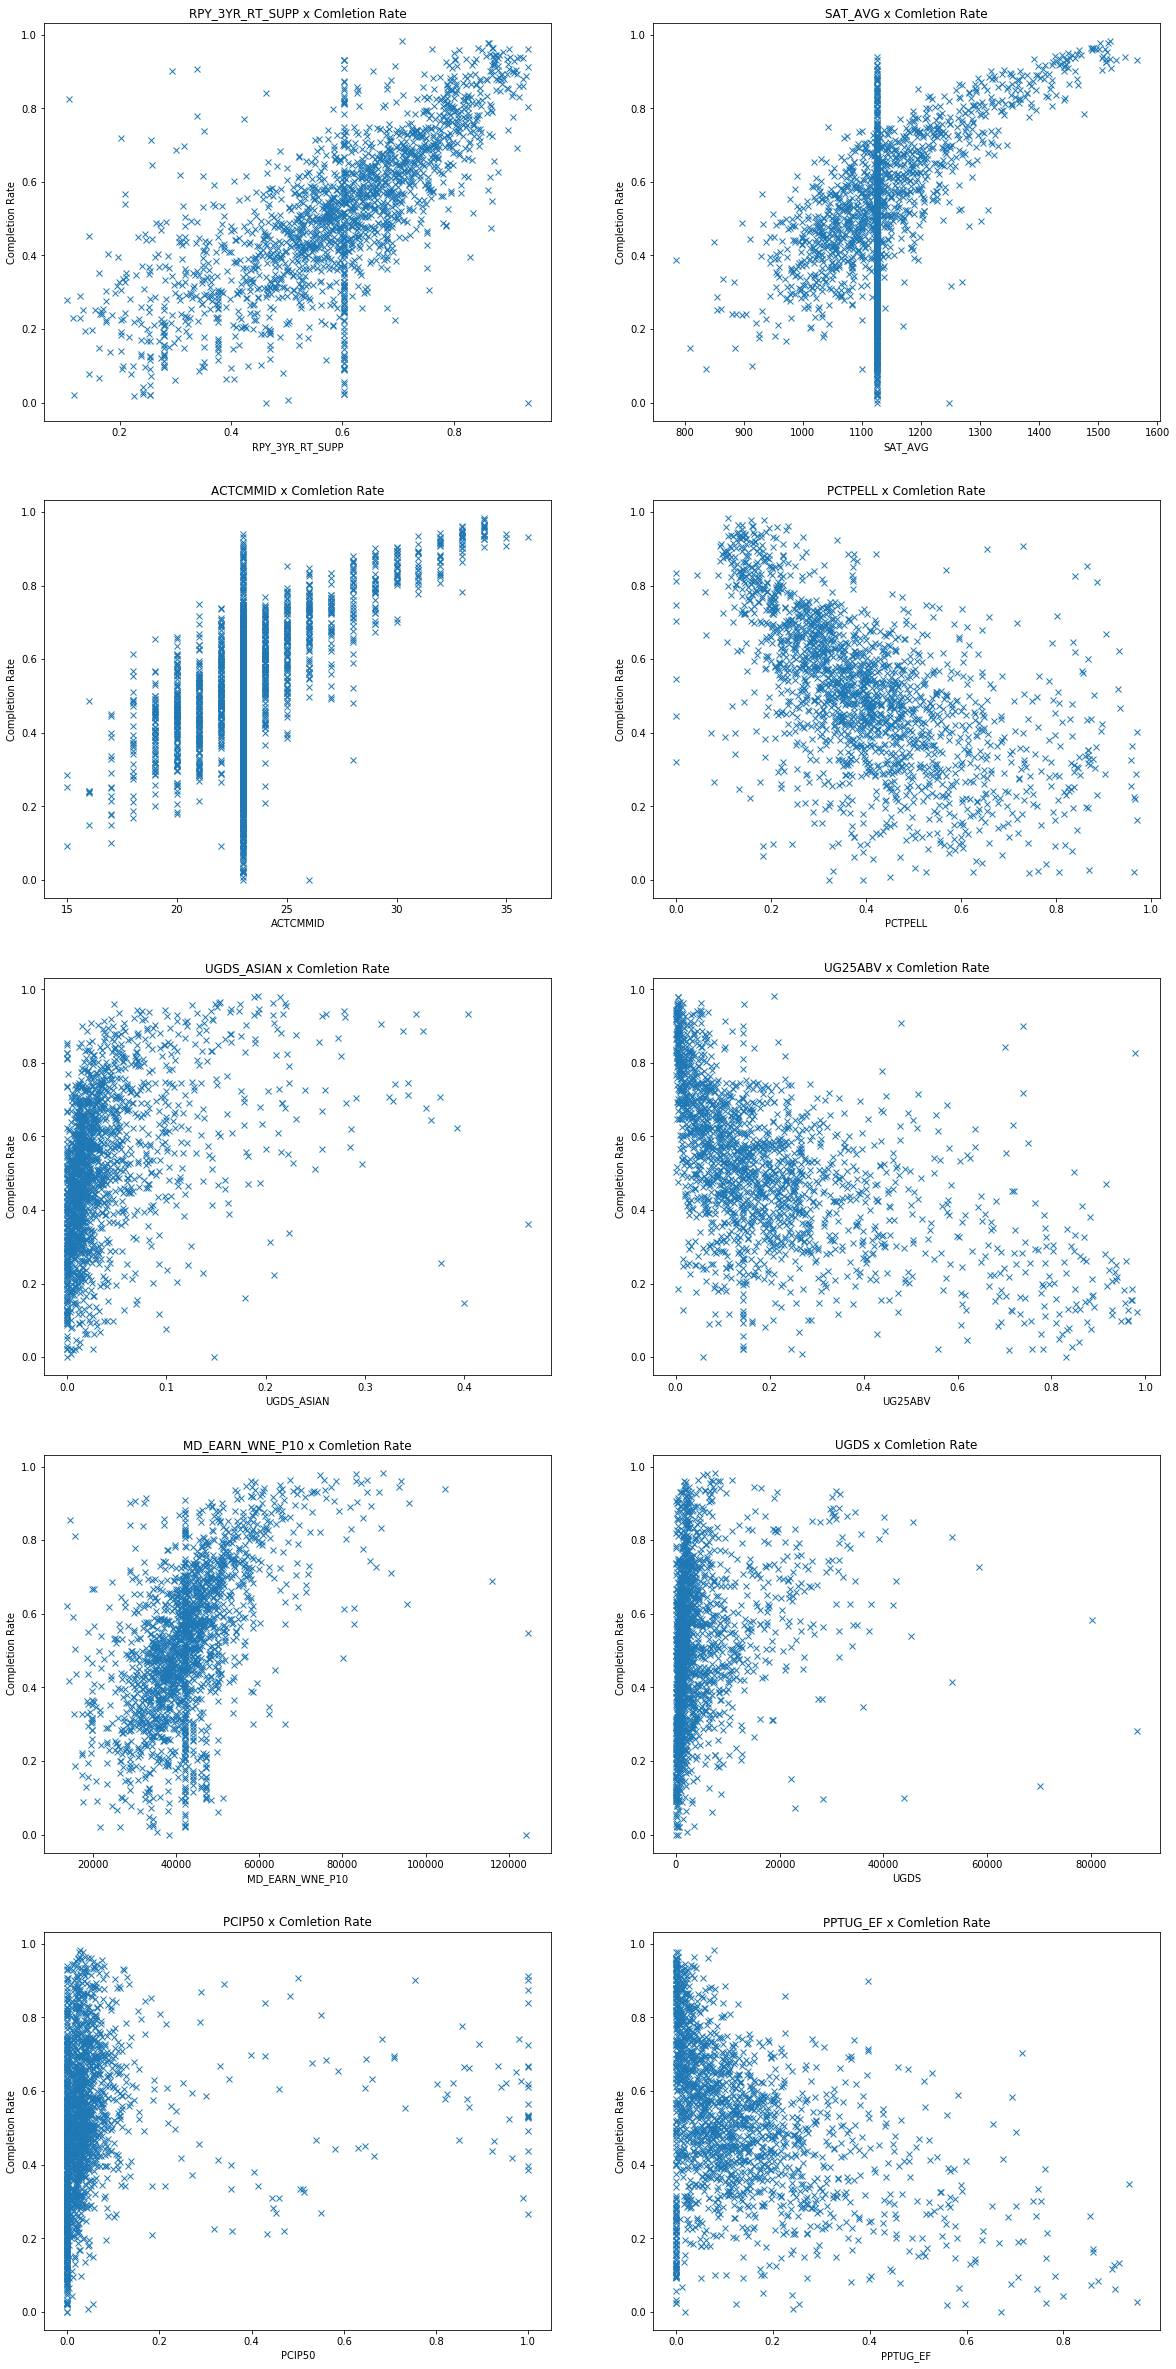

In [65]:
com_rate = target_com

plt.figure(figsize=(20, 60))

for i, col in enumerate(top10_com):
    plt.subplot(7, 2, i+1)
    plt.plot(df_com[col], com_rate, 'x')
    plt.title('%s x Comletion Rate' % col)
    plt.xlabel(col)
    plt.ylabel('Completion Rate')

### Feature Importance for Retention Rate Data

In [66]:
model_ret = GradientBoostingRegressor(learning_rate=0.1, n_estimators=70, max_depth=3, random_state=42)
model_ret.fit(X_train_ret, y_train_ret)
features = features_ret.columns
print("Features sorted by their score:")
result_ret = sorted(zip(map(lambda x: round(x, 4), model_ret.feature_importances_), features), reverse=True)
result_ret

Features sorted by their score:


[(0.3452, 'RPY_3YR_RT_SUPP'),
 (0.1296, 'SAT_AVG'),
 (0.0923, 'UG25ABV'),
 (0.0756, 'ACTCMMID'),
 (0.0507, 'UGDS'),
 (0.0447, 'UGDS_ASIAN'),
 (0.0382, 'PCTPELL'),
 (0.0316, 'MD_EARN_WNE_P10'),
 (0.0238, 'UGDS_AIAN'),
 (0.019, 'PCIP52'),
 (0.0177, 'UGDS_BLACK'),
 (0.0173, 'NPT4_PRIV'),
 (0.0139, 'PCIP24'),
 (0.0086, 'UGDS_NHPI'),
 (0.0084, 'PCIP31'),
 (0.007, 'PCIP38'),
 (0.0065, 'PCIP45'),
 (0.0059, 'HIGHDEG_certificate'),
 (0.0051, 'PPTUG_EF'),
 (0.0049, 'UGDS_HISP'),
 (0.0045, 'UNITID'),
 (0.0044, 'PCIP54'),
 (0.0038, 'UGDS_2MOR'),
 (0.0034, 'UGDS_NRA'),
 (0.0033, 'PCIP40'),
 (0.0029, 'PCIP12'),
 (0.0028, 'PCIP50'),
 (0.0027, 'UGDS_WHITE'),
 (0.0026, 'PCIP39'),
 (0.0025, 'GRAD_DEBT_MDN_SUPP'),
 (0.0023, 'PCIP51'),
 (0.002, 'PCIP19'),
 (0.0019, 'PCIP43'),
 (0.0018, 'PCIP30'),
 (0.0016, 'PCTFLOAN'),
 (0.0015, 'PRGMOFR'),
 (0.0015, 'PCIP03'),
 (0.001, 'UGDS_UNKN'),
 (0.001, 'PCIP26'),
 (0.0007, 'PREDDEG_associate'),
 (0.0007, 'PCIP47'),
 (0.0005, 'PREDDEG_certificate'),
 (0.0005, 'PCIP1

In [67]:
top10_ret = ['RPY_3YR_RT_SUPP', 'SAT_AVG', 'UG25ABV', 'ACTCMMID', 'UGDS', 
             'UGDS_ASIAN', 'PCTPELL', 'MD_EARN_WNE_P10', 'UGDS_AIAN',  'PCIP52']

|Rank| Variable ID | Description (Percentage of Degrees Awarded in) |
| :--- | :--- |:--- |
| 1 | RPY_3YR_RT_SUPP | 3-year repayment rate |
| 2 | SAT_AVG | Average SAT equivalent score of students admitted|
| 3 | UG25ABV | Percentage of undergraduates aged 25 and above |
| 4 | ACTCMMID | Midpoint of the ACT cumulative score |
| 5 | UGDS | Enrollment of undergraduate certificate/degree-seeking students|
| 6 | UGDS_ASIAN | Total share of enrollment of undergraduate degree-seeking students who are Asian |
| 7 | PCTPELL | Percentage of undergraduates who receive a Pell Grant |
| 8 | MD_EARN_WNE_P10 | Median earnings of students working and not enrolled 10 years after entry |
| 9 | UGDS_AIAN | Total share of enrollment of undergraduate degree-seeking students who are American Indian/Alaska Native |
| 10 | PCIP52 | Business, Management, Marketing, And Related Support Services|




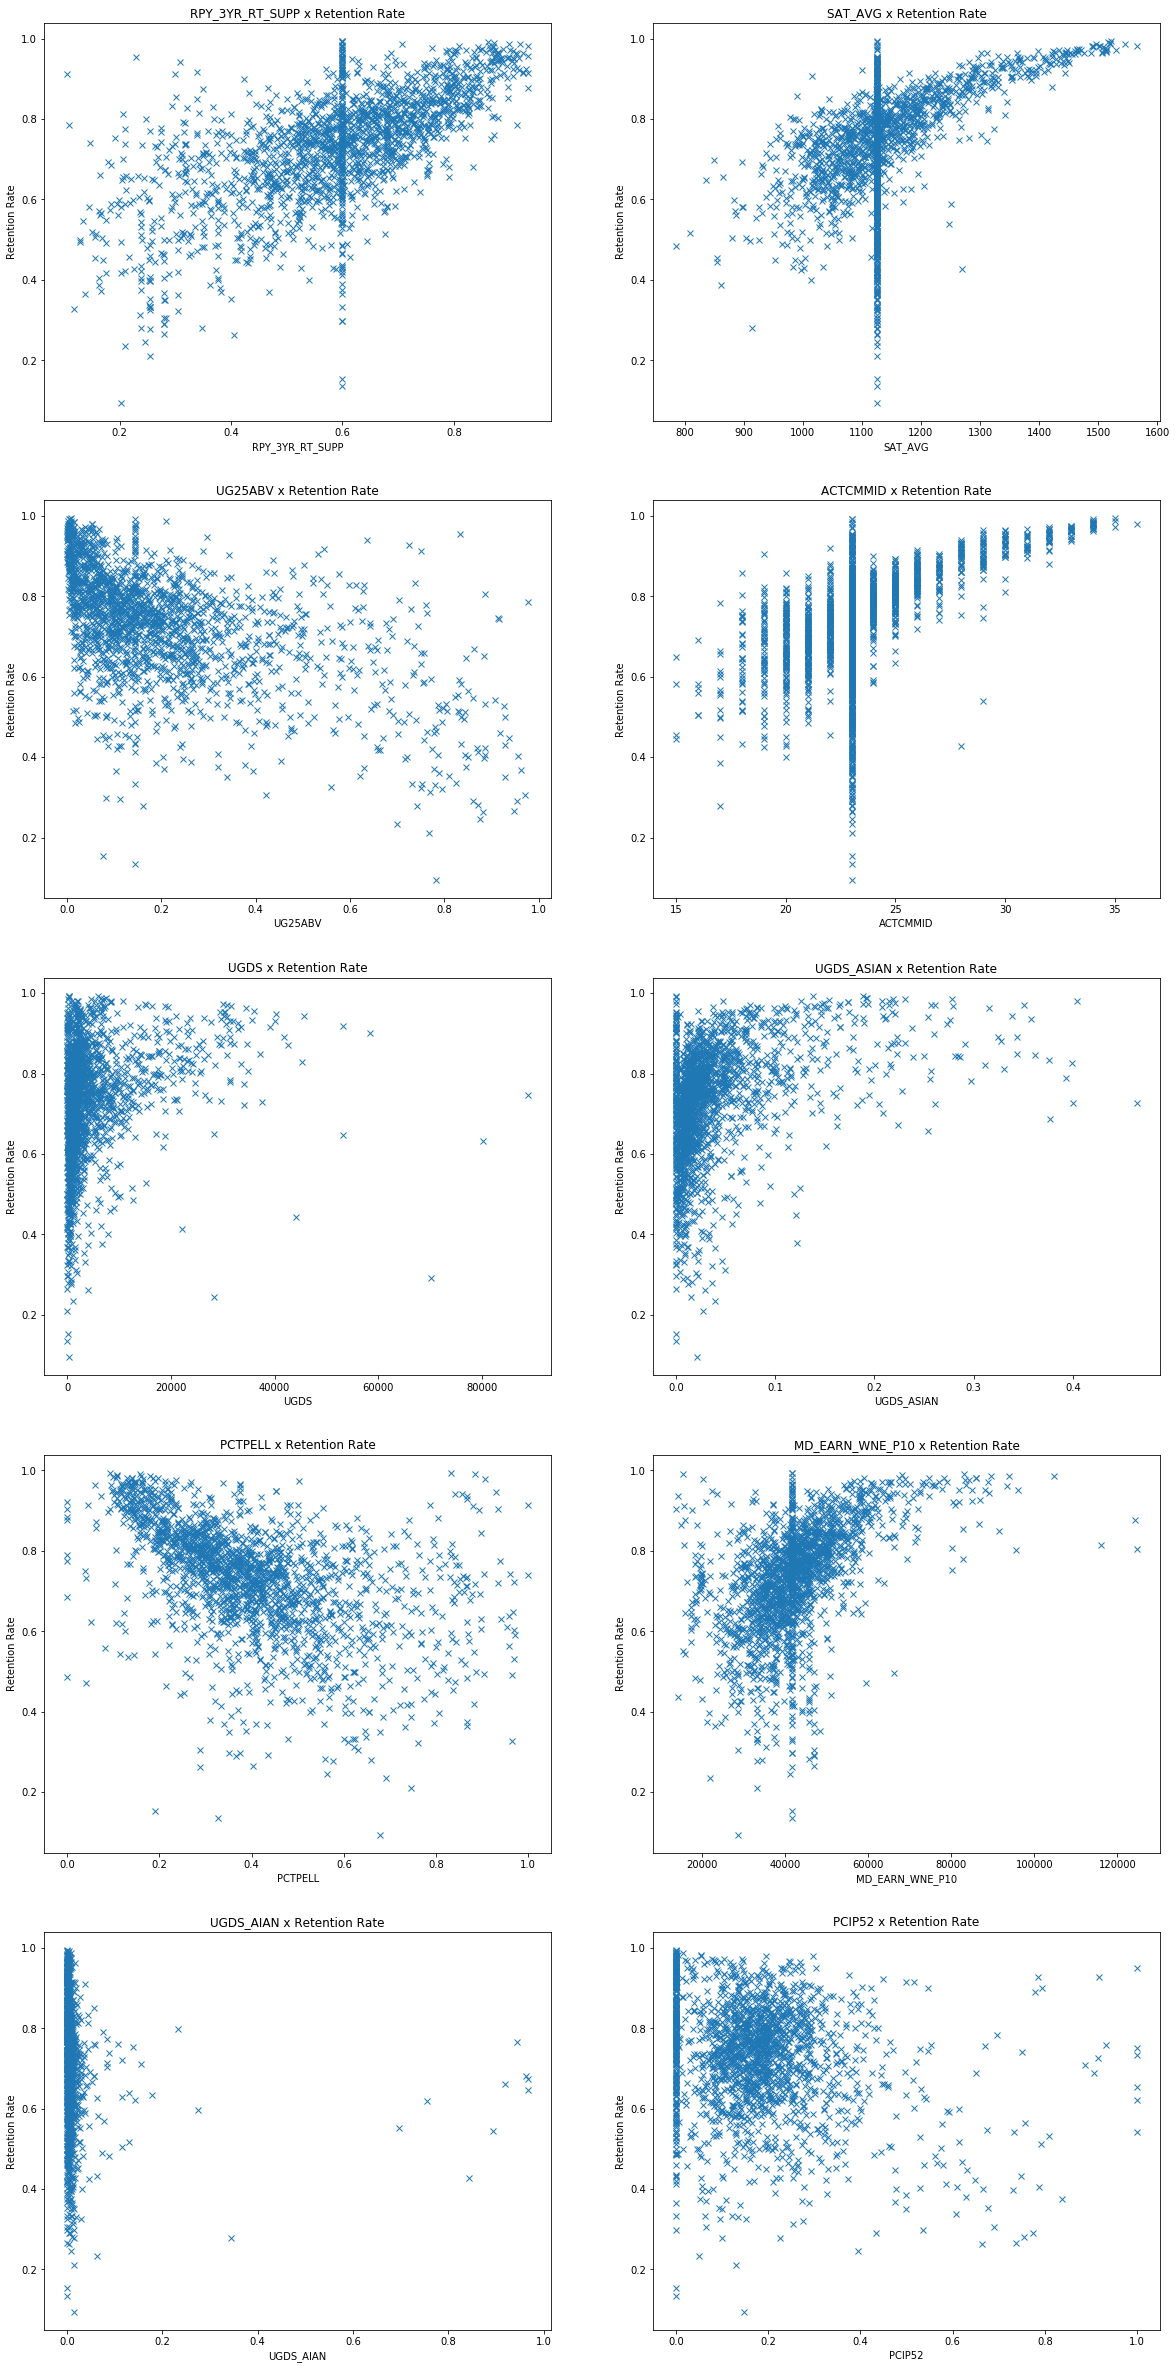

In [69]:
ret_rate = target_ret

plt.figure(figsize=(20, 60))

for i, col in enumerate(top10_ret):
    plt.subplot(7, 2, i+1)
    plt.plot(df_ret[col], ret_rate, 'x')
    plt.title('%s x Retention Rate' % col)
    plt.xlabel(col)
    plt.ylabel('Retention Rate')

In [70]:
list_difference = []

for feature in top10_com:
    if feature not in top10_ret:
        list_difference.append(feature)

print(list_difference)

['PCIP50', 'PPTUG_EF']


In [71]:
list_difference = []

for feature in top10_ret:
    if feature not in top10_com:
        list_difference.append(feature)

print(list_difference)

['UGDS_AIAN', 'PCIP52']
